### Differential Equation

$\frac{\mathrm{d}\Psi}{\mathrm{d}x} = 4x,$

$\Psi(0) = 0, x \in [-4, 4]$

In [1]:
from typing import List
import autograd.numpy as np

from neural_network import MLPNeuralNetwork
from optimizers import gradient_descent, adam
from activation_functions import elu, sigmoid, tanh, arctan
from plotting_tools import plot_ode, plot_system_ode

In [2]:
PSI_0 = np.array([0])


def derivative(x, psi) -> np.ndarray:
    """Example #1 derivative.

    Args:
        x: The input vector
        psi: The function vector

    Returns:
        Value of psi's partial derivatives at x.
    """
    psi_dot = 4 * x
    return psi_dot


def analytical_solution(x):
    """Analytical solution to example #1.
    Args:
        x: The input vector

    Returns:
        Value of psi at x.
    """
    return 2 * x**2


def trial_solution(
    t: np.array, nn: MLPNeuralNetwork, weights: List[np.array], k=0
) -> np.ndarray:
    """Calculates the trial solution of the system of DEs.

    Args:
        t: The input vector
        weights: The weights and biases of the neural network

    Returns:
        A NumPy array of the trial solution of the system of DEs
        dimension (len(t),)
    """
    fp = nn.forward(t, weights).reshape(t.size)
    return PSI_0[k] + t * fp

### Training

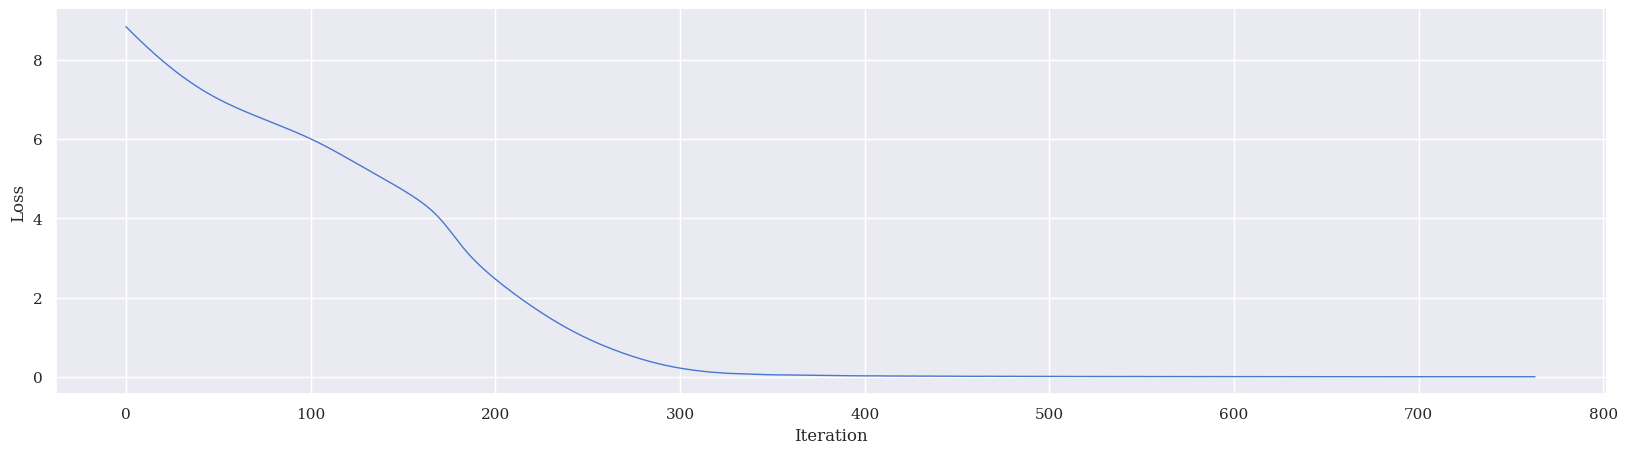

In [5]:
def train():
    t = np.arange(-4, 4, 0.1)
    hidden_sizes = np.array([10])
    activation_fns = [sigmoid] * (len(hidden_sizes)) + [lambda x: x]
    nn = MLPNeuralNetwork(1, hidden_sizes, 1, activation_fns)
    adam(t, [nn], trial_solution, derivative, num_iters=50000, step_size=0.01)

    return nn


nn = train()

### Evaluating Results

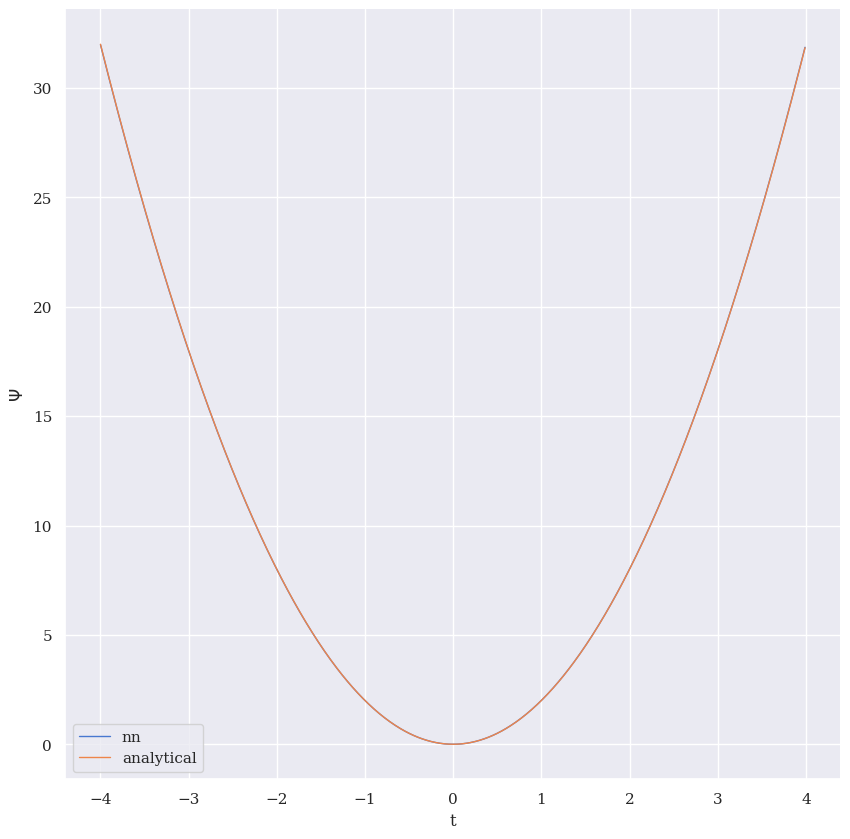

In [8]:
plot_ode(nn, trial_solution, analytical_solution, t=np.arange(-4, 4, 0.01))